# **Características en imágenes - MatchingImages**

1. Realizar un programa que cree una foto
panorámica partir de dos imágenes
2. Mostrar las mejores coincidencias
3. Usar características ORB
4. Hacer uso de las funciones de CV

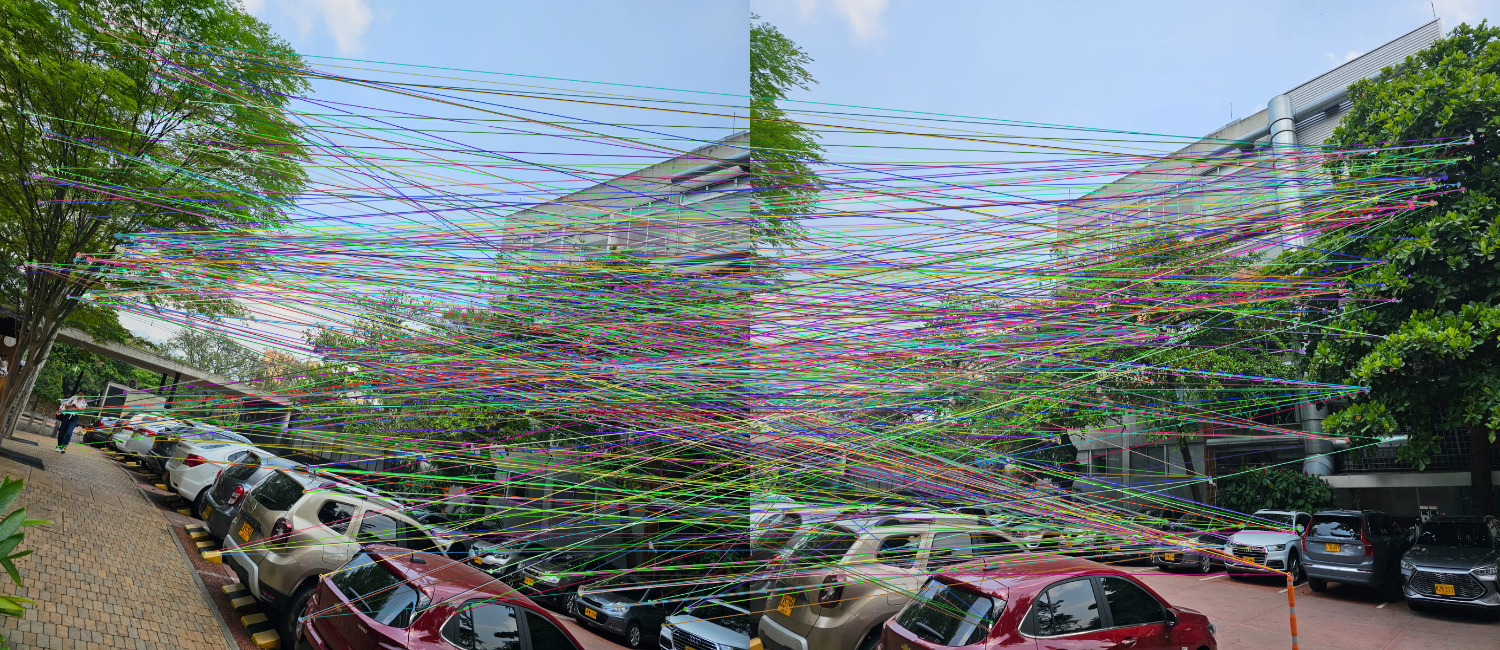

-1

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('/content/drive/MyDrive/Computervision/MatchImages/1.jpg')
train_img = cv2.imread('/content/drive/MyDrive/Computervision/MatchImages/2.jpg')
# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:],None)

final_img = cv2.resize(final_img, (1500,650))

# Show the final image
cv2_imshow(final_img)
cv2.waitKey(3000)


Your Panorama is ready!!!


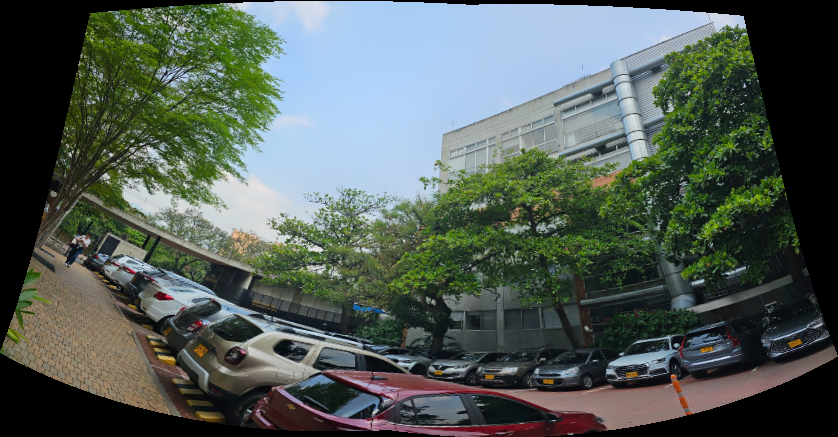

In [9]:
image_paths=['/content/drive/MyDrive/Computervision/MatchImages/1.jpg','/content/drive/MyDrive/Computervision/MatchImages/2.jpg']
# initialized a list of images
imgs = []

for i in range(len(image_paths)):
	imgs.append(cv2.imread(image_paths[i]))
	imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)
	# this is optional if your input images isn't too large
	# you don't need to scale down the image
	# in my case the input images are of dimensions 3000x1200
	# and due to this the resultant image won't fit the screen
	# scaling down the images
# showing the original pictures

stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(imgs)

if dummy != cv2.STITCHER_OK:
# checking if the stitching procedure is successful
# .stitch() function returns a true value if stitching is
# done successfully
	print("stitching ain't successful")
else:
	print('Your Panorama is ready!!!')

# final output
cv2_imshow(output)